In [48]:
import pandas as pd
import numpy as np

In [28]:
data = pd.read_csv(r'src\affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [30]:
X = data[data.columns[:-1]]
y = data['affair']

In [31]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
lr = LogisticRegression()
lr = lr.fit(X_tr, y_tr)
predictions = lr.predict(X_ts)
proba = lr.predict_proba(X_ts)

In [33]:
cm = confusion_matrix(y_ts, predictions)
tn, fp, fn, tp = cm.ravel()

In [39]:
(tn, fp, fn, tp)

(1143, 132, 399, 236)

manual

In [38]:
tp1, tn1, fp1, fn1 = [0,0,0,0]
for p, true in zip(proba[:,0], y_ts):
    if p >= 0.5: # predicted class 0
        if true == 0:
            tn1 += 1
        else:
            fn1 += 1
            
    else: # predicted class 1
        if true == 1:
            tp1 += 1
        else:
            fp1 += 1

In [40]:
(tn1, fp1, fn1, tp1)

(1143, 132, 399, 236)

Считаем TPR и FPR

In [45]:
tpr1 = tp1 / (tp1 + fn1)
fpr1 = fp1 / (fp1 + tn1)
print('tpr1:',tpr,'\nfpr1:',fpr)

tpr1: 0.3716535433070866 
fpr1: 0.10352941176470588


## AUC

## TPR FPR

roc_curve

In [35]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

In [36]:
fpr, tpr, thresholds = roc_curve(y_ts, proba[:,1])

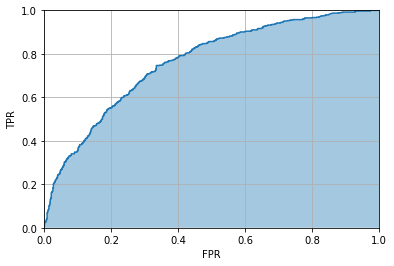

In [37]:
plt.plot( fpr, tpr )
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.fill_between(fpr, tpr, alpha=0.4)
plt.grid()

manual

In [70]:
def tprfpr(threshold):
    tp1, tn1, fp1, fn1 = [0,0,0,0]
    for p, true in zip(proba[:,0], y_ts):
        if p >= threshold: # predicted class 0
            if true == 0:
                tn1 += 1
            else:
                fn1 += 1

        else: # predicted class 1
            if true == 1:
                tp1 += 1
            else:
                fp1 += 1

    tpr1 = tp1 / (tp1 + fn1)
    fpr1 = fp1 / (fp1 + tn1)
    
    return tpr1, fpr1

In [82]:
thresholds = np.linspace(0,1,100)

def build_roc(thresholds):
    tpr_ls = []
    fpr_ls = []
    
    for p in thresholds:
        tpr, fpr = tprfpr(p)
        tpr_ls.append(tpr)
        fpr_ls.append(fpr)
        
    return tpr_ls, fpr_ls

tpr_ls = build_roc(thresholds)[0]
fpr_ls = build_roc(thresholds)[1]

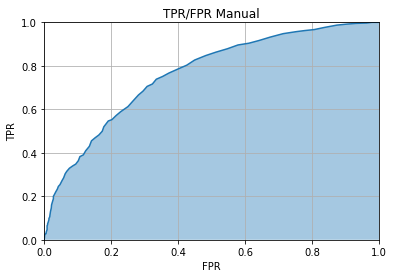

In [86]:
plt.plot( fpr_ls, tpr_ls )
plt.xlim([0,1])
plt.ylim([0,1])

plt.title('TPR/FPR Manual')
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.fill_between(fpr_ls, tpr_ls, alpha=0.4)
plt.grid()

Precision - Recall

In [74]:
precision, recall, thresholds = precision_recall_curve(y_ts, proba[:,1])

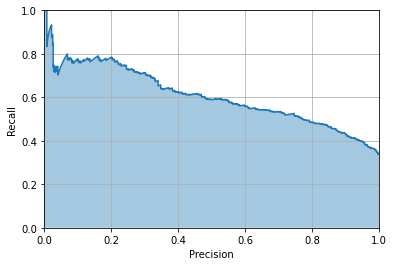

In [75]:
plt.plot( recall, precision )
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('Precision')
plt.ylabel('Recall')

plt.fill_between(recall, precision, alpha=0.4)
plt.grid()